In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("transit_data.csv")
df

,T,FCOR
0,2146.452489,1.000410
1,2146.513785,1.000296
2,2146.534218,1.000208
3,2146.554650,1.000183
4,2146.575082,1.000185
...,...,...
995,2168.682365,1.000320
996,2168.702796,1.000321
997,2168.723228,1.000285
998,2168.743660,1.000301


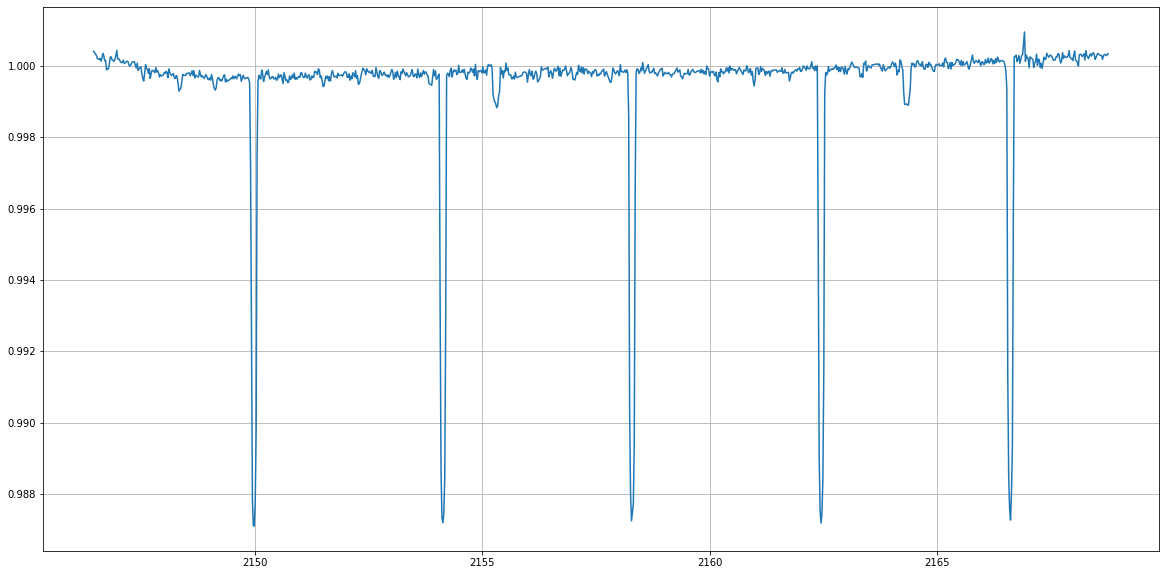

In [176]:

time = df[df.columns[0]]
rb = df[df.columns[1]]
rb = np.array(rb)
plt.figure(figsize=(20,10))
plt.plot(time,rb)
plt.grid()



In [177]:
_rb = rb.copy()
idx = np.where(_rb > 0.998)
_rb[idx] = 1

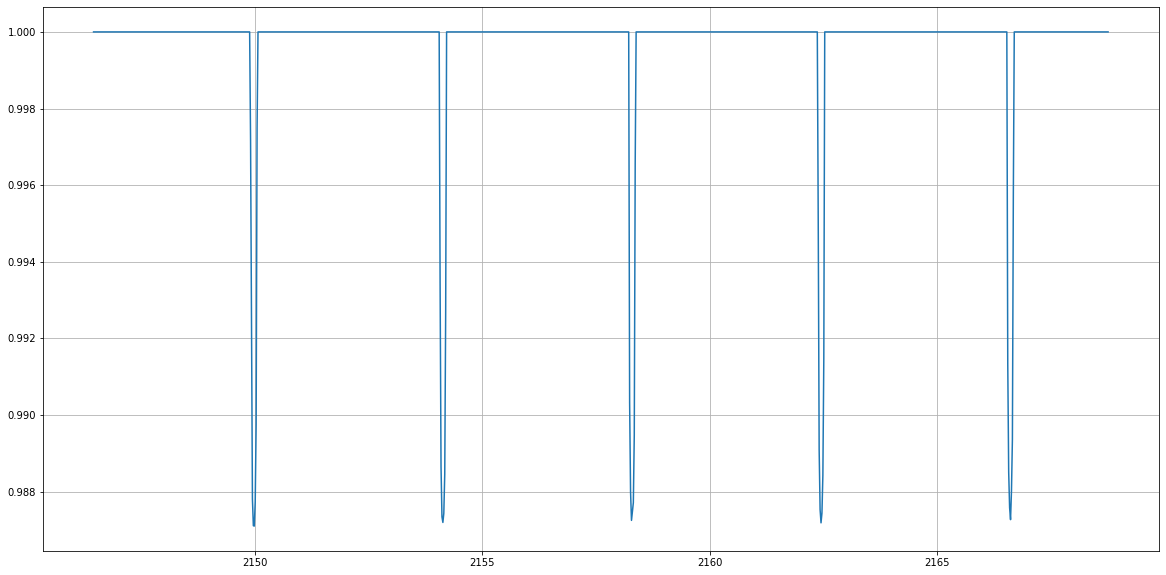

In [178]:
plt.figure(figsize=(20,10))
plt.plot(time,_rb)
plt.grid()

In [179]:
from scipy.signal import argrelextrema
minimas = argrelextrema(_rb,np.less)[0]
min_time = [time[i] for i in minimas]
period = [ time[minimas[i+1]] - time[minimas[i]] for i in range(len(minimas)-1)] ##in days ig
print(period)

[4.147691038583162, 4.1476733025842805, 4.1680889082708745, 4.168074298504507]


In [180]:
time_p =0
for i in range(len(period)):
    time_p = time_p + period[i]
time_p = time_p/len(period)
print(time_p) ##average period of revoltion

4.157881886985706


In [181]:
Depths = [_rb[minimas[i]] for i in range(len(minimas))]
print(Depths)

[0.9871026186801264, 0.9871975290035744, 0.9872514219889896, 0.9871872691658496, 0.9872708930864716]


In [182]:
B=0 ## average brightness during depths
for i in range (len(Depths)):
    B =B + Depths[i]
B = B/len(Depths)
print(B)
D0 = 1 - B

0.9872019463850024


In [183]:
R0 = 7e8 ## Radius of Star
R_p = R0*np.sqrt(D0)
R_p = R_p/(1000) ##kms
print(R_p) #Planet Radius



79189.93794257478


In [184]:

start2 = np.zeros(100)
k=0
for i in range(len(time)-1):
    if( _rb[i] == 1 and _rb[i+1] != 1):
        start2[k] = i-1
        k=k+1

In [185]:
k=0
end2 = np.zeros(100)
for i in range(len(time)-1):
    if( _rb[i] != 1 and _rb[i+1] == 1):
        end2[k] = i
        k=k+1
print(end2)
print(start2)

[162. 353. 545. 728. 910.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]
[154. 345. 538. 720. 902.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [186]:
ttt2 = np.zeros(5)
for i in range(5):
    ttt2[i] = time[end2[i]] - time[start2[i]]
print(ttt2)


[0.18388818 0.16345543 0.16345485 0.16345425 0.16345362]


In [187]:
width = 0
for i in range(5):
    width = width + ttt2[i]
width = width/5
print(width*24)

4.0209903754432155


In [190]:
print("Radius of the planet is              : ",format(int(R_p)),"KM.")
print("The Orbital revolution time period is: ",round(time_p,2)," Earth Days.")
print("The transit duration is              : ",round((width*24),2)," Hours.")



Radius of the planet is              :  79189 KM.
The Orbital revolution time period is:  4.16  Earth Days.
The transit duration is              :  4.02  Hours.
